<a href="https://colab.research.google.com/github/Sariyakareem/Project_Code_For_Image_Classification/blob/main/Image_Classification_on_Cifar_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
# Importing TensorFlow and Keras libraries for creating and training neural network models
import tensorflow as tf
from tensorflow.keras.datasets import cifar10  # CIFAR-10 dataset for image classification tasks
from tensorflow.keras.models import Sequential  # Allows for the creation of a sequential neural network model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization  # Core layers used in constructing CNNs
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Enables data augmentation for better model generalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input  # Importing the Input layer for defining input shapes

# Libraries for data visualization and numerical computations
import matplotlib.pyplot as plt  # Used for visualizing training performance and augmented images
import numpy as np  # Useful for performing numerical operations and handling arrays


# Loading the Dataset

In [ ]:
# Load CIFAR-10 data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Normalize data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


# Applying Data Augmentation

In [ ]:
# Configure data augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Randomly shift images vertically by up to 10% of the height
    zoom_range=0.1  # Randomly zoom into images by up to 10%
)

# Apply data augmentation to the training set
datagen.fit(X_train)


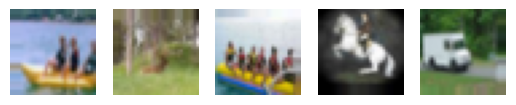

In [ ]:
# Display augmented images from the training data
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=5):
    for i in range(5):
        plt.subplot(1, 5, i + 1)  # Create a subplot for each image
        plt.imshow(X_batch[i])  # Display the augmented image
        plt.axis('off')  # Hide the axes for better visualization
    plt.show()  # Render the images
    break  # Display only one batch and stop


# Defining the Model Structure

In [ ]:
# Define the enhanced CNN model architecture with Batch Normalization
model = Sequential([
    Input(shape=(32, 32, 3)),  # Explicitly define the input shape

    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # Normalize activations
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),  # Additional convolutional layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fourth convolutional block
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fifth convolutional block (newly added block for more feature extraction)
    Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Flatten and dense layers
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # Normalize activations
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compiling the Model

In [ ]:
# Compile model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

Training the Model

In [ ]:
# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',                     # Monitor validation loss
        patience=5,                             # Number of epochs with no improvement
        restore_best_weights=True,              # Restore weights of the best epoch
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',                     # Monitor validation loss
        factor=0.5,                             # Reduce learning rate by a factor of 0.5
        patience=3,                             # Patience before reducing learning rate
        min_lr=1e-71,                            # Minimum learning rate
        verbose=1
    )
]

# Train the model using the augmented data generator with callbacks
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=64),  # Training with augmented data
    epochs=50,                                      # Number of training epochs
    validation_data=(X_test, Y_test),               # Validation on the test set
    callbacks=callbacks                             # Adding callbacks
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 69ms/step - accuracy: 0.1350 - loss: 6.6937 - val_accuracy: 0.1787 - val_loss: 5.8325 - learning_rate: 1.0000e-04
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 50ms/step - accuracy: 0.2118 - loss: 5.8407 - val_accuracy: 0.3477 - val_loss: 5.2025 - learning_rate: 1.0000e-04
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.2713 - loss: 5.4512 - val_accuracy: 0.4178 - val_loss: 4.9293 - learning_rate: 1.0000e-04
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.3398 - loss: 5.1213 - val_accuracy: 0.4324 - val_loss: 4.7243 - learning_rate: 1.0000e-04
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.3910 - loss: 4.8179 - val_accuracy: 0.4685 - val_loss: 4.4825 - learning_rate: 1.0000e-04
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.4434 - loss: 4.4873 - val_accuracy: 0.4976 - val_loss: 4.1898 - learning_rate: 1.0000e-04
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/ste

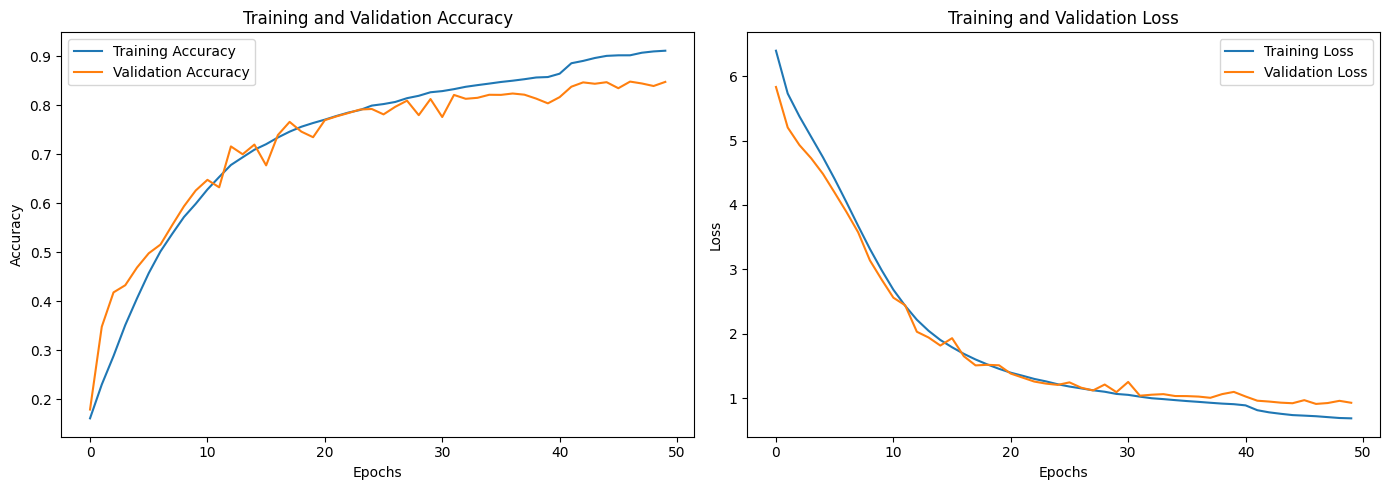

In [ ]:
# Plot the training and validation accuracy and loss curves
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
